# Lab C2 W4: Multi-class Classifier

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-10-17 08:07:42--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  20.5MB/s    in 11s     

2023-10-17 08:07:53 (18.1 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-10-17 08:07:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.

In [ ]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [ ]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-044.png', 'rock07-k03-080.png', 'rock03-052.png', 'rock01-069.png', 'rock01-029.png', 'rock04-036.png', 'rock01-075.png', 'rock01-098.png', 'rock06ck02-090.png', 'rock03-092.png']
['paper03-043.png', 'paper03-068.png', 'paper03-067.png', 'paper05-068.png', 'paper03-027.png', 'paper02-000.png', 'paper06-044.png', 'paper04-089.png', 'paper04-062.png', 'paper07-106.png']
['scissors02-049.png', 'scissors04-016.png', 'testscissors01-069.png', 'scissors01-081.png', 'scissors04-029.png', 'scissors01-092.png', 'testscissors02-038.png', 'testscissors02-002.png', 'testscissors01-107.png', 'scissors01-099.png']


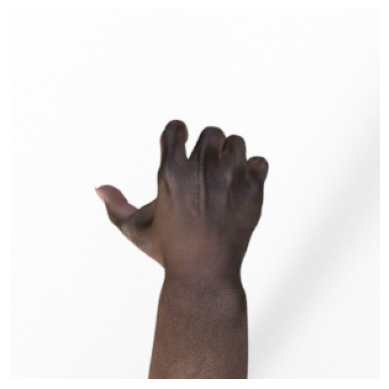

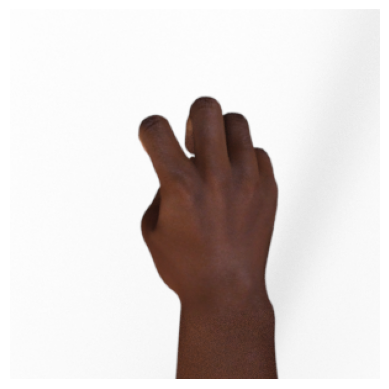

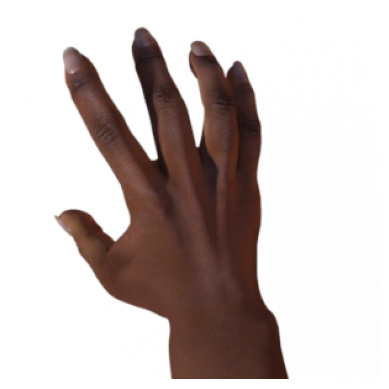

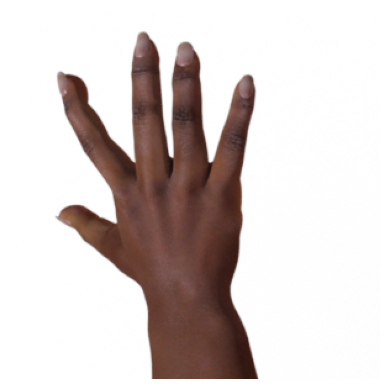

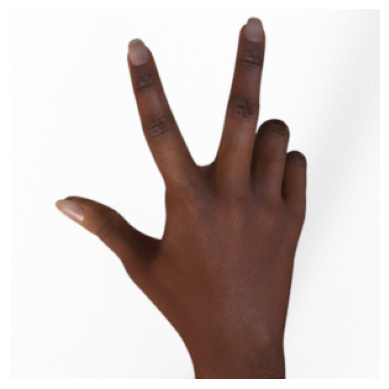

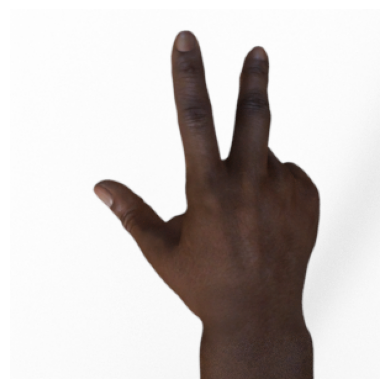

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img

image_array = img_to_array(load_img(os.path.join(rock_dir, os.listdir(rock_dir)[0])))
print(f'The shape of image {image_array.shape}')

The shape of image (300, 300, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_dir = 'tmp/rps-train/rps'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=126,
    class_mode='categorical',
    target_size=(150,150)
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_dir = 'tmp/rps-test/rps-test-set'
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(150,150)
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Build model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_generator,
          epochs=25,
          steps_per_epoch=20,
          validation_data=validation_generator,
          validation_steps=3,
          verbose=1)

Epoch 1/25
20/20 [==============================] - 25s 1s/step - loss: 1.1311 - accuracy: 0.3476 - val_loss: 1.0939 - val_accuracy: 0.3958
Epoch 2/25
20/20 [==============================] - 23s 1s/step - loss: 1.1015 - accuracy: 0.3413 - val_loss: 1.1159 - val_accuracy: 0.3750
Epoch 3/25
20/20 [==============================] - 23s 1s/step - loss: 1.0797 - accuracy: 0.4063 - val_loss: 0.9926 - val_accuracy: 0.7292
Epoch 4/25
20/20 [==============================] - 22s 1s/step - loss: 1.0451 - accuracy: 0.4778 - val_loss: 1.0089 - val_accuracy: 0.3750
Epoch 5/25
20/20 [==============================] - 23s 1s/step - loss: 1.0231 - accuracy: 0.5079 - val_loss: 0.6638 - val_accuracy: 0.7500
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.8194 - accuracy: 0.6123 - val_loss: 0.4321 - val_accuracy: 0.8542
Epoch 7/25
20/20 [==============================] - 22s 1s/step - loss: 0.6975 - accuracy: 0.6893 - val_loss: 0.3272 - val_accuracy: 0.9583
Epoch 8/25
20/20 [==

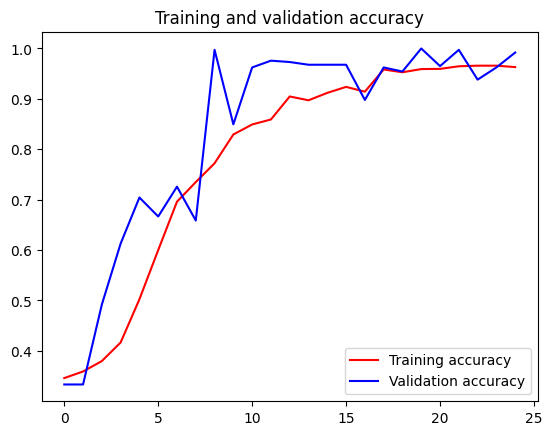

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# C2W4 Assignment: MNIST Dataset using CNN

